## Homework

The goal of this notebook is:

* Data preparation and data cleaning
* EDA
* feature importance analysis
* Model selection process and parameter tuning

The variable to predict will be 'gender'

### Dataset

In this notebook, we will use the Young People Survey data from [Kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey).

##### Observations

* The data file (responses.csv) consists of 1010 rows and 150 columns (139
integer and 11 categorical).
* For convenience, the original variable names were shortened in the
data file. See the columns.csv file if you want to match the data with the original names.
* The data contain missing values.
* The survey was presented to participants in both electronic and written form.
* The original questionnaire was in Slovak language and was later translated
into English.
* All participants were of Slovakian nationality, aged between 15-30.


In [89]:
import pandas as pd
import seaborn as snsimport 
import matplotlib.pyplot as plt


# Data preparation

In [1]:
df = pd.read_csv('responses.csv')

In [12]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('-','')

In [13]:
df.head()

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,age,height,weight,number_of_siblings,gender,left__right_handed,education,only_child,village__town,house__block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [14]:
df.describe()

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,shopping_centres,branded_clothing,entertainment_spending,spending_on_looks,spending_on_gadgets,spending_on_healthy_eating,age,height,weight,number_of_siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


<AxesSubplot:>

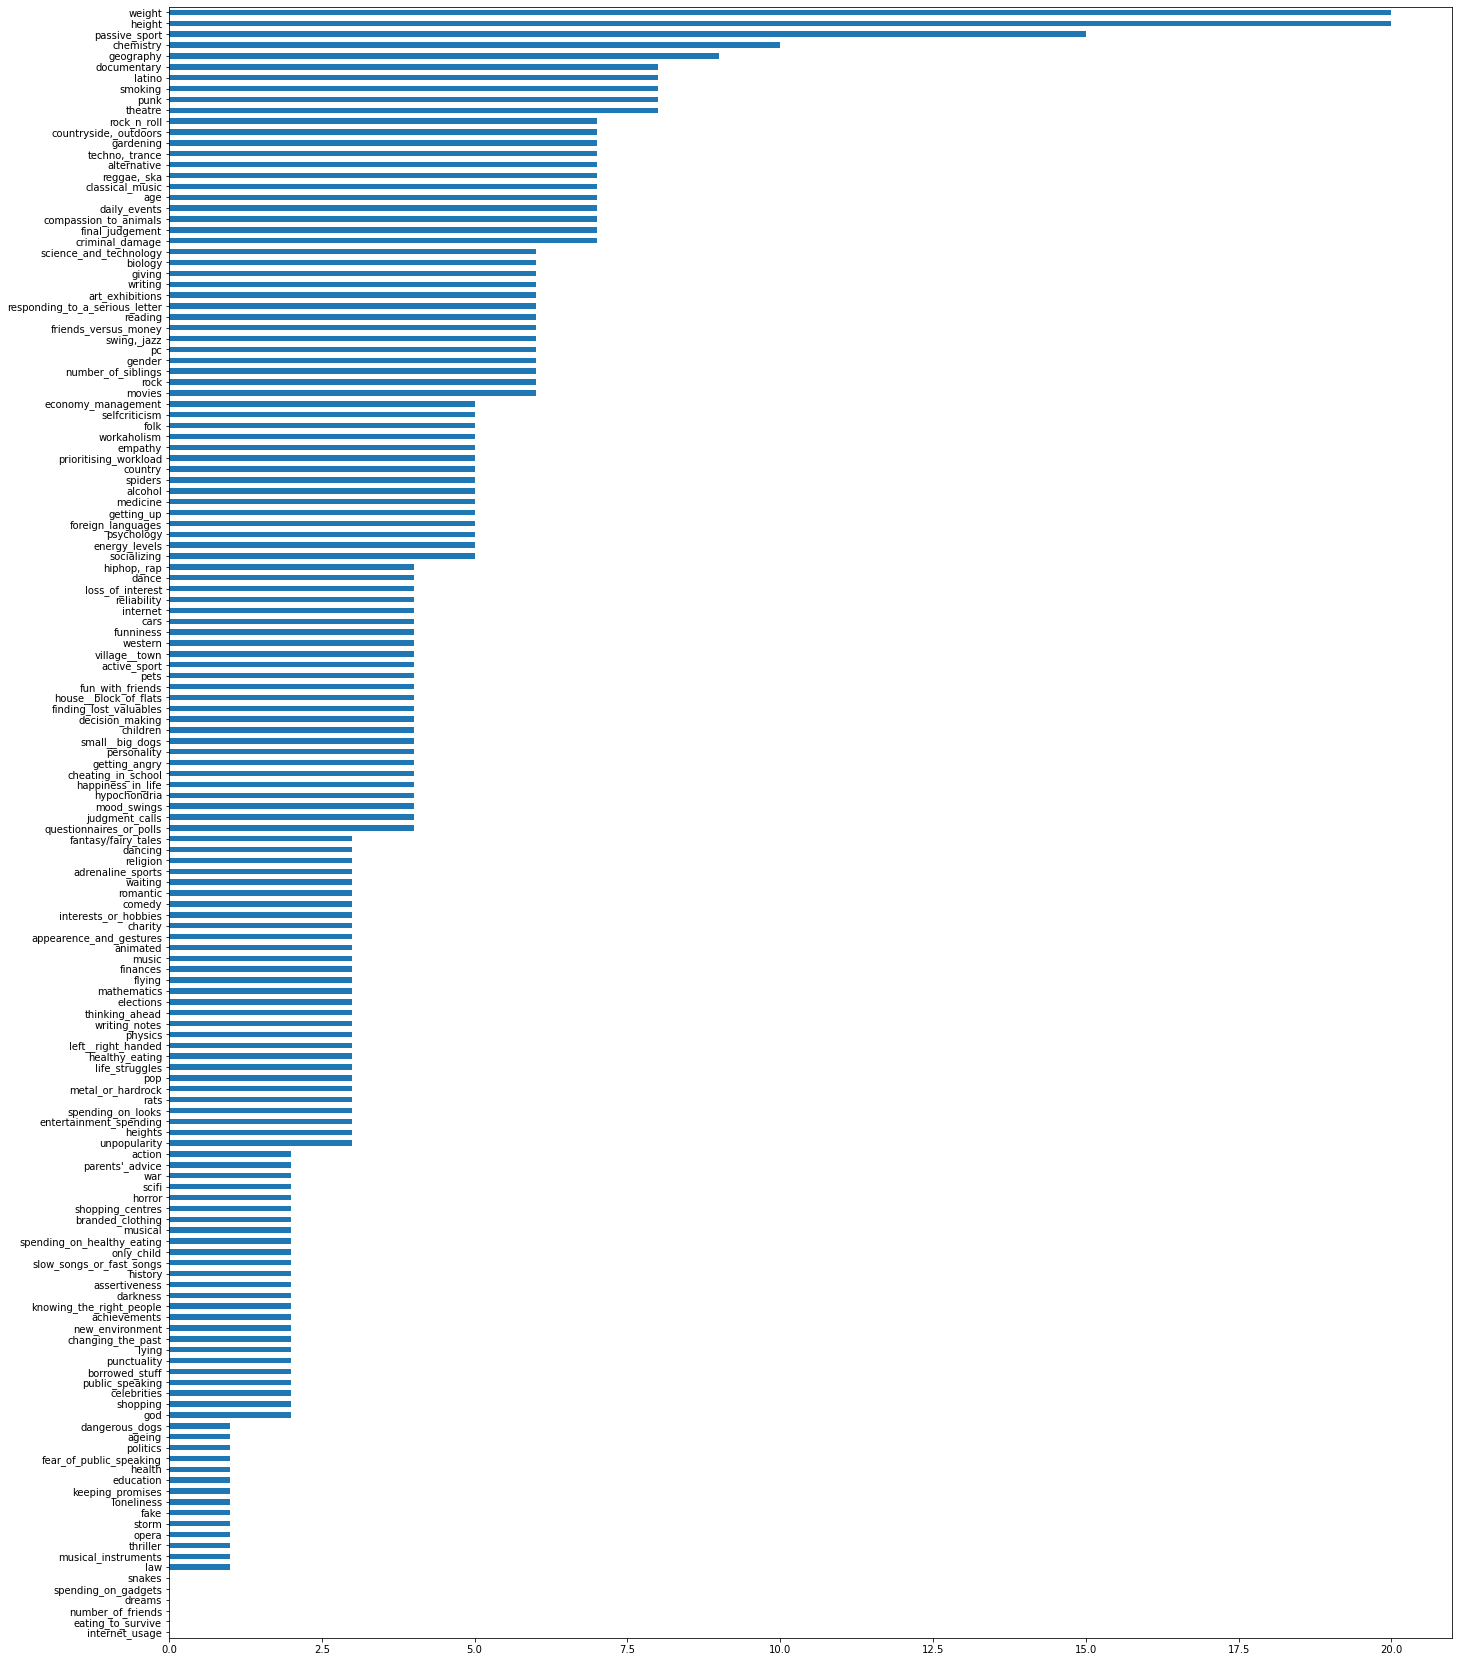

In [15]:
nulls = df.isnull().sum().sort_values()
nulls.plot.barh(  figsize=(23, 30))

`Weight` and `height` are the main characteristics that have missing values

In [33]:
df_nulls = pd.concat([df['weight'].isnull(),df['height'].isnull(),df['gender']],axis=1) 
df_nulls.groupby('gender').sum()

,weight,height
gender,,
female,13,13
male,6,6


Women omitted 13 values, which is more than double that of men 

# EDA

In [66]:
df_topic = df.loc[:, 'music':'metal_or_hardrock']
sub_df = pd.concat([df_topic,df['gender']],axis=1)
sub_df


,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,gender
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,female
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,female
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,female
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,female
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,female
...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,female
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,male
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,female
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,female


In [69]:
df_unpivot = pd.melt(sub_df, id_vars='gender')
df_unpivot

,gender,variable,value
0,female,music,5.0
1,female,music,4.0
2,female,music,5.0
3,female,music,5.0
4,female,music,5.0
...,...,...,...
10095,female,metal_or_hardrock,3.0
10096,male,metal_or_hardrock,1.0
10097,female,metal_or_hardrock,1.0
10098,female,metal_or_hardrock,1.0


In [83]:
df_new =df_unpivot.groupby(['variable','gender']).mean().reset_index()
df_new 

,variable,gender,value
0,classical_music,female,2.954315
1,classical_music,male,2.960688
2,country,female,2.052365
3,country,male,2.221130
4,dance,female,3.150592
5,dance,male,3.048900
6,folk,female,2.323181
7,folk,male,2.230392
8,metal_or_hardrock,female,2.160473
9,metal_or_hardrock,male,2.639024


(1.0, 5.0)

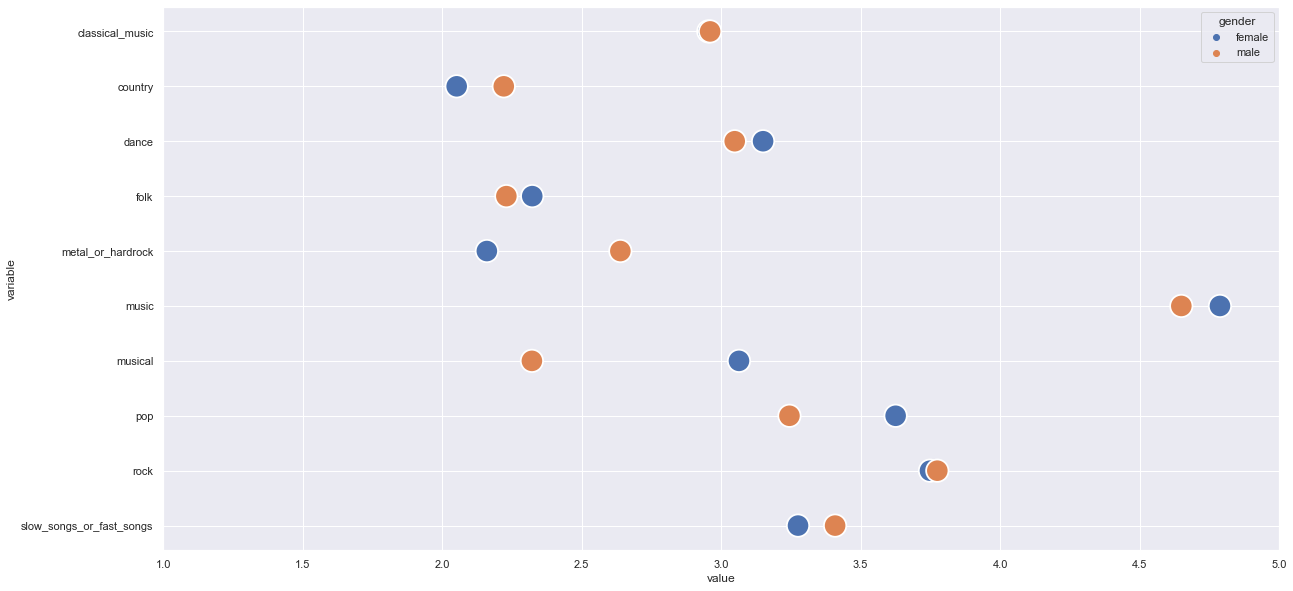

In [95]:
fig, ax = plt.subplots()

sns.set(rc={"figure.figsize":(20, 10)}) #width=8, height=4
sns.scatterplot(y="variable",x="value",data=df_new, hue="gender" ,s=500)

ax.set_xlim(1, 5)

In [53]:
df_global = df.mean()
df_global

<ipython-input-53-7a943a988ff2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_global = df.mean()


music                           4.731877
slow_songs_or_fast_songs        3.328373
dance                           3.113320
folk                            2.288557
country                         2.123383
                                 ...    
spending_on_healthy_eating      3.557540
age                            20.433699
height                        173.514141
weight                         66.405051
number_of_siblings              1.297809
Length: 139, dtype: float64

In [54]:

#df.groupby(['favorite_color','gender']).size().reset_index(name='count')
import numpy as np
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_group = df.groupby(['gender']).mean().T
    df_group['diff'] = np.abs(df_group['female'] -df_group['male']) 
    df_group = df_group[df_group['diff']>0.3]
    #df_group['diff'] =  df_group -df_global
    display(df_group.sort_values(by='diff',ascending=False))
    

gender,female,male,diff
weight,58.963793,77.088889,18.125096
height,167.770690,181.758025,13.987335
life_struggles,3.681356,2.097324,1.584032
cars,2.159322,3.442822,1.283500
pc,2.627551,3.870732,1.243181
war,2.697635,3.829268,1.131633
reading,3.614601,2.503667,1.110934
romantic,3.932432,2.853301,1.079132
spiders,3.254237,2.205379,1.048858
action,3.113367,4.141119,1.027752


In [55]:
df_toy = df[['gender','weight','height','life_struggles','cars','pc','war','reading','romantic','spiders','action','shopping']]

In [56]:
df_toy = df_toy.dropna()

In [57]:
df_toy['gender'] =(df_toy['gender']=='male').astype('int')

In [58]:
df_toy = df_toy.fillna(df_toy.mean())


In [59]:
df_toy.sample(5)

,gender,weight,height,life_struggles,cars,pc,war,reading,romantic,spiders,action,shopping
407,0,44.0,166.0,4.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0
41,1,80.0,188.0,2.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0,1.0
625,0,50.0,163.0,4.0,2.0,4.0,1.0,1.0,5.0,5.0,4.0,4.0
841,1,65.0,185.0,4.0,3.0,4.0,2.0,3.0,2.0,4.0,4.0,1.0
676,0,55.0,62.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0


In [60]:
df_toy.dtypes

gender              int32
weight            float64
height            float64
life_struggles    float64
cars              float64
pc                float64
war               float64
reading           float64
romantic          float64
spiders           float64
action            float64
shopping          float64
dtype: object

In [61]:
df_toy.isnull().sum()

gender            0
weight            0
height            0
life_struggles    0
cars              0
pc                0
war               0
reading           0
romantic          0
spiders           0
action            0
shopping          0
dtype: int64

In [62]:
X = df_toy.drop(['gender'], axis = 1)
y = df_toy.gender

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [64]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dicts = X_train.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

In [65]:
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [66]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=10000,C=0.15)
clf_lr.fit(X_train, y_train)

clf_lr.score(X_test,y_test)

0.9578947368421052

In [67]:
import bentoml

tag = bentoml.sklearn.save_model('ml_proyect', clf_lr,custom_objects={
    'DictVectorizer':dv
})
print(tag)

Model(tag="ml_proyect:a2x6jvkyqcposlhq")


In [68]:
!bentoml models get ml_proyect:latest

name: ml_proyect                                                               
version: a2x6jvkyqcposlhq                                                      
module: bentoml.sklearn                                                        
labels: {}                                                                     
options: {}                                                                    
metadata: {}                                                                   
context:                                                                       
  framework_name: sklearn                                                      
  framework_versions:                                                          
    scikit-learn: 1.1.2                                                        
  bentoml_version: 1.0.7                                                       
  python_version: 3.9.13                                                       
signatures:                             

In [69]:
clf_lr.predict(X_test)[0:5]

array([1, 1, 0, 0, 1])

In [70]:
test_dicts[2]

{'weight': 48.0,
 'height': 160.0,
 'life_struggles': 4.0,
 'cars': 1.0,
 'pc': 3.0,
 'war': 1.0,
 'reading': 4.0,
 'romantic': 5.0,
 'spiders': 5.0,
 'action': 4.0,
 'shopping': 5.0}

In [ ]:
dv.transform